### EXTREMELY USEFUL + LOTS OF DATA - Mesa Del Sol Microgrid

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Display summary statistics
def display_statistics(df):
    print("Summary Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

# Plot time-series data for numeric columns
def plot_time_series(df, time_col):
    plt.figure(figsize=(12, 6))
    numeric_columns = df.select_dtypes(include=['number']).columns
    for col in numeric_columns:
        if col != time_col:
            plt.plot(df[time_col], df[col], label=col)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.title("Time Series Plot")
    plt.xticks(rotation=45)
    plt.show()

# Plot histograms for all numeric columns
def plot_histograms(df):
    numeric_df = df.select_dtypes(include=['number'])
    
    # Create subplots with more space between them
    num_columns = len(numeric_df.columns)
    num_rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)  # Adjust rows based on number of columns
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Create subplots with more height for better spacing
    axes = axes.flatten()  # Flatten axes to easily iterate through them
    
    # Plot histograms
    for i, col in enumerate(numeric_df.columns):
        numeric_df[col].hist(ax=axes[i], bins=30)
        axes[i].set_title(f"Histogram of {col}")
    
    # Adjust layout to add space between subplots
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Add vertical space between plots
    plt.show()

# Plot boxplots for all numeric columns
def plot_boxplots(df):
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=45)
    plt.title("Boxplots of Numeric Columns")
    plt.show()

# Plot correlation heatmap for numeric columns
def plot_correlation_heatmap(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Generate the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


In [ ]:
df = load_data(file_path)

df = df.iloc[2000:3350]

In [53]:
df.head(5)

,Timestamp,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
2000,2023/04/01 05:33:21,0.0,0.0,0.0,131.0,134.300003,122.0,40.0,38.0,40.0,-131.0,489.0,487.0,489.0,59.970001,59.970001,12.6,14.1
2001,2023/04/01 05:33:31,0.1,0.0,0.0,112.0,128.800003,122.0,40.0,38.0,40.0,-135.0,489.0,487.0,489.0,59.980000,59.980000,12.7,14.1
2002,2023/04/01 05:33:41,-0.1,0.0,0.0,124.0,97.500000,122.0,40.0,38.0,40.0,-127.0,489.0,487.0,489.0,59.980000,59.980000,12.7,14.1
2003,2023/04/01 05:33:51,0.0,0.0,0.0,111.0,136.500000,122.0,40.0,38.0,40.0,-126.0,489.0,487.0,489.0,59.980000,59.980000,12.7,14.1
2004,2023/04/01 05:34:01,-0.2,0.0,0.0,110.0,112.300003,122.0,40.0,38.0,40.0,-133.0,489.0,487.0,489.0,59.980000,59.970001,12.7,14.1


In [56]:
df.columns

Index(['Timestamp', 'Battery_Active_Power',
       'Battery_Active_Power_Set_Response', 'PVPCS_Active_Power',
       'GE_Body_Active_Power', 'GE_Active_Power',
       'GE_Body_Active_Power_Set_Response', 'FC_Active_Power_FC_END_Set',
       'FC_Active_Power', 'FC_Active_Power_FC_end_Set_Response',
       'Island_mode_MCCB_Active_Power', 'MG-LV-MSB_AC_Voltage',
       'Receiving_Point_AC_Voltage', 'Island_mode_MCCB_AC_Voltage',
       'Island_mode_MCCB_Frequency', 'MG-LV-MSB_Frequency',
       'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature'],
      dtype='object')

Mesa Del Sol microgrid located in Albuquerque, New Mexico
https://microgrid-symposiums.org/microgrid-examples-and-demonstrations/mesa-del-sol-microgrid/
50kW PV (photovoltaic cell), 80kW fuel cell, 240 natural gas-powered generator - lead acid battery bank, hot and cold thermal storage, and adsorption chiller
900kW lead acid battery capacity, 160kWh lead acid battery storage

Battery Active Power (kW): Power generated by the battery storage system - Positive values indicate discharge (providing power); negative values likely indicate charging (consuming power)

Battery Active Power Set Response (kW): How the battery responds to setpoint changes - Measures actual power adjustment compared to requested change, showing response time and accuracy

PVPCS Active Power (kW): Power generated by photovoltaic (PV) solar panels - Varies with sunlight availability and weather conditions



GE Body Active Power (kW): Power consumed by Generator Engine (GE) body - Represents specific energy use by the generator components

GE Active Power (kW): Total microgrid power consumption - Shows the overall system load across all components

GE Body Active Power Set Response (kW): Generator Engine's response to setpoint changes - Indicates how quickly and accurately the GE adjusts to command changes



FC Active Power (FC-end) Set (kW): Fuel Cell power output target - The requested power generation level

FC Active Power (kW): Actual Fuel Cell power output - The realized power generation, which may differ from the target

FC Active Power (FC-end) Set Response (kW): Fuel Cell's response to setpoint changes - Shows adjustment accuracy and response characteristics.




Island mode MCCB Active Power (kW): Power consumed by Molded Case Circuit Breaker during isolated operation - Important for monitoring when disconnected from main grid.
    Molded Case Circuit Breakers (MCCBs) are specialized breakers providing enhanced protection and reliability for electrical systems

Island mode MCCB AC Voltage (V): MCCB voltage during isolated operation - Important for stability monitoring when operating independently.

Island mode MCCB Frequency (Hz): MCCB frequency during isolated operation - Critical parameter for system stability when disconnected from main grid.


MG-LV-MSB AC Voltage (V): Microgrid Low-Voltage Main Switchboard voltage - Indicates voltage quality at the main distribution point.

MG-LV-MSB Frequency (Hz): Microgrid Low-Voltage Main Switchboard frequency - Indicates system synchronization status.



Receiving Point AC Voltage (V): Grid connection point voltage - Critical for monitoring interface with external grid.



Microgrid combines multiple power sources, generation, storage and distribution components:

Battery active power - electricity flowing to and from the batteries (kW), response shows how fast it responds to commands

PVPCS active power - electricity generated by solar panles (kW)

Fuel cell - natural gas power generator

Generator engine - likely a conventional fossil fuel powered generator diesel

MCCB (Molded Case Circuit Breaker) is integrated into the microgrid for safety. Statistics for island mode with it are provided for active power (kW)

Main switchboard - Power quality in kW

Receiving point AC voltage (V)

Under normal circumstances - the microgrid operates while connected to the main utility grid - PVPCS generates solar energy, fuel cells provide consistent baseline power generation, batteries store excess or discharge based on demand, main switchboard distributes throughout system, gird conneciton allows power exchange with the main grid

When microgrid disconnects, MCCB (Molded Case Circuit Breaker) manages transition to indepedent operation - active power, voltage freq are critical and they are recorded. Battery systems increase output to maintain stability while fuel cells adjsut output to match demand

Batteries and fuel cells compensate for fluctuations of solar production, demand updates setpoints for batteries (set response metric shows the speed of reacting to demands)

Island mode is a fundamental operating state. While connected to the main utility grid, it provides voltage and freq reference, absorbs excess power, and supplies additional power (based ond demand. In island mode, it physically disconnects and maintains its own voltage and freq and does not import/export power from the main grid. 

The MCCB is responsible for the actual physical break and handles the switch

Summary Statistics:
       Battery_Active_Power  Battery_Active_Power_Set_Response  \
count           1350.000000                             1350.0   
mean              -0.077259                                0.0   
std                0.123009                                0.0   
min               -0.400000                                0.0   
25%               -0.200000                                0.0   
50%               -0.100000                                0.0   
75%                0.000000                                0.0   
max                0.200000                                0.0   

       PVPCS_Active_Power  GE_Body_Active_Power  GE_Active_Power  \
count         1350.000000           1350.000000      1350.000000   
mean            13.228889            120.786667       118.633557   
std             11.148112              8.362371        15.989540   
min             -1.000000             61.000000        21.500000   
25%              1.000000            116.0000

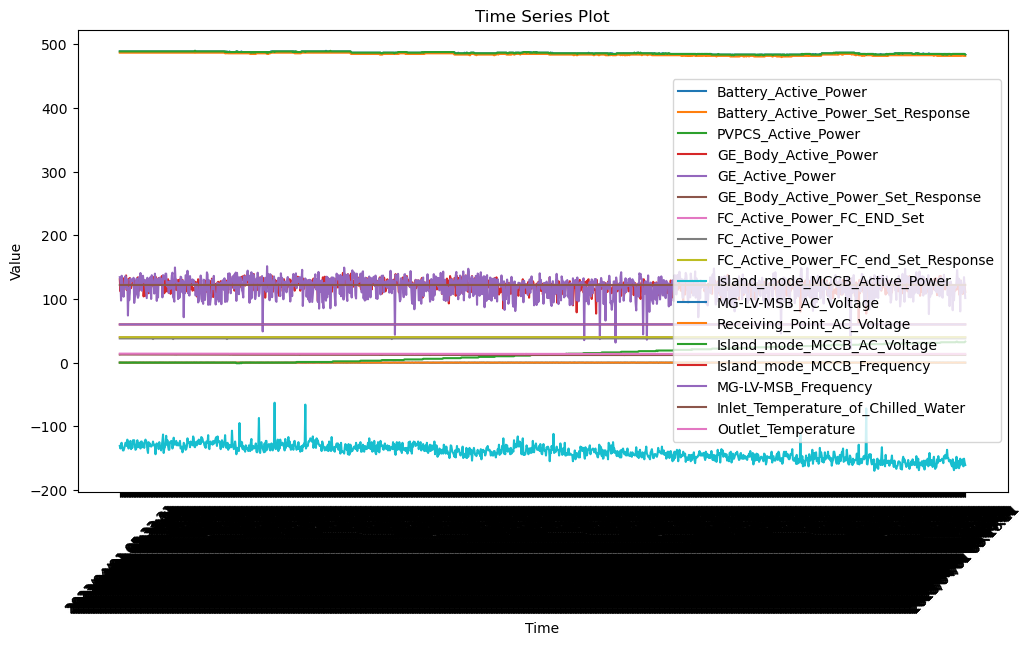

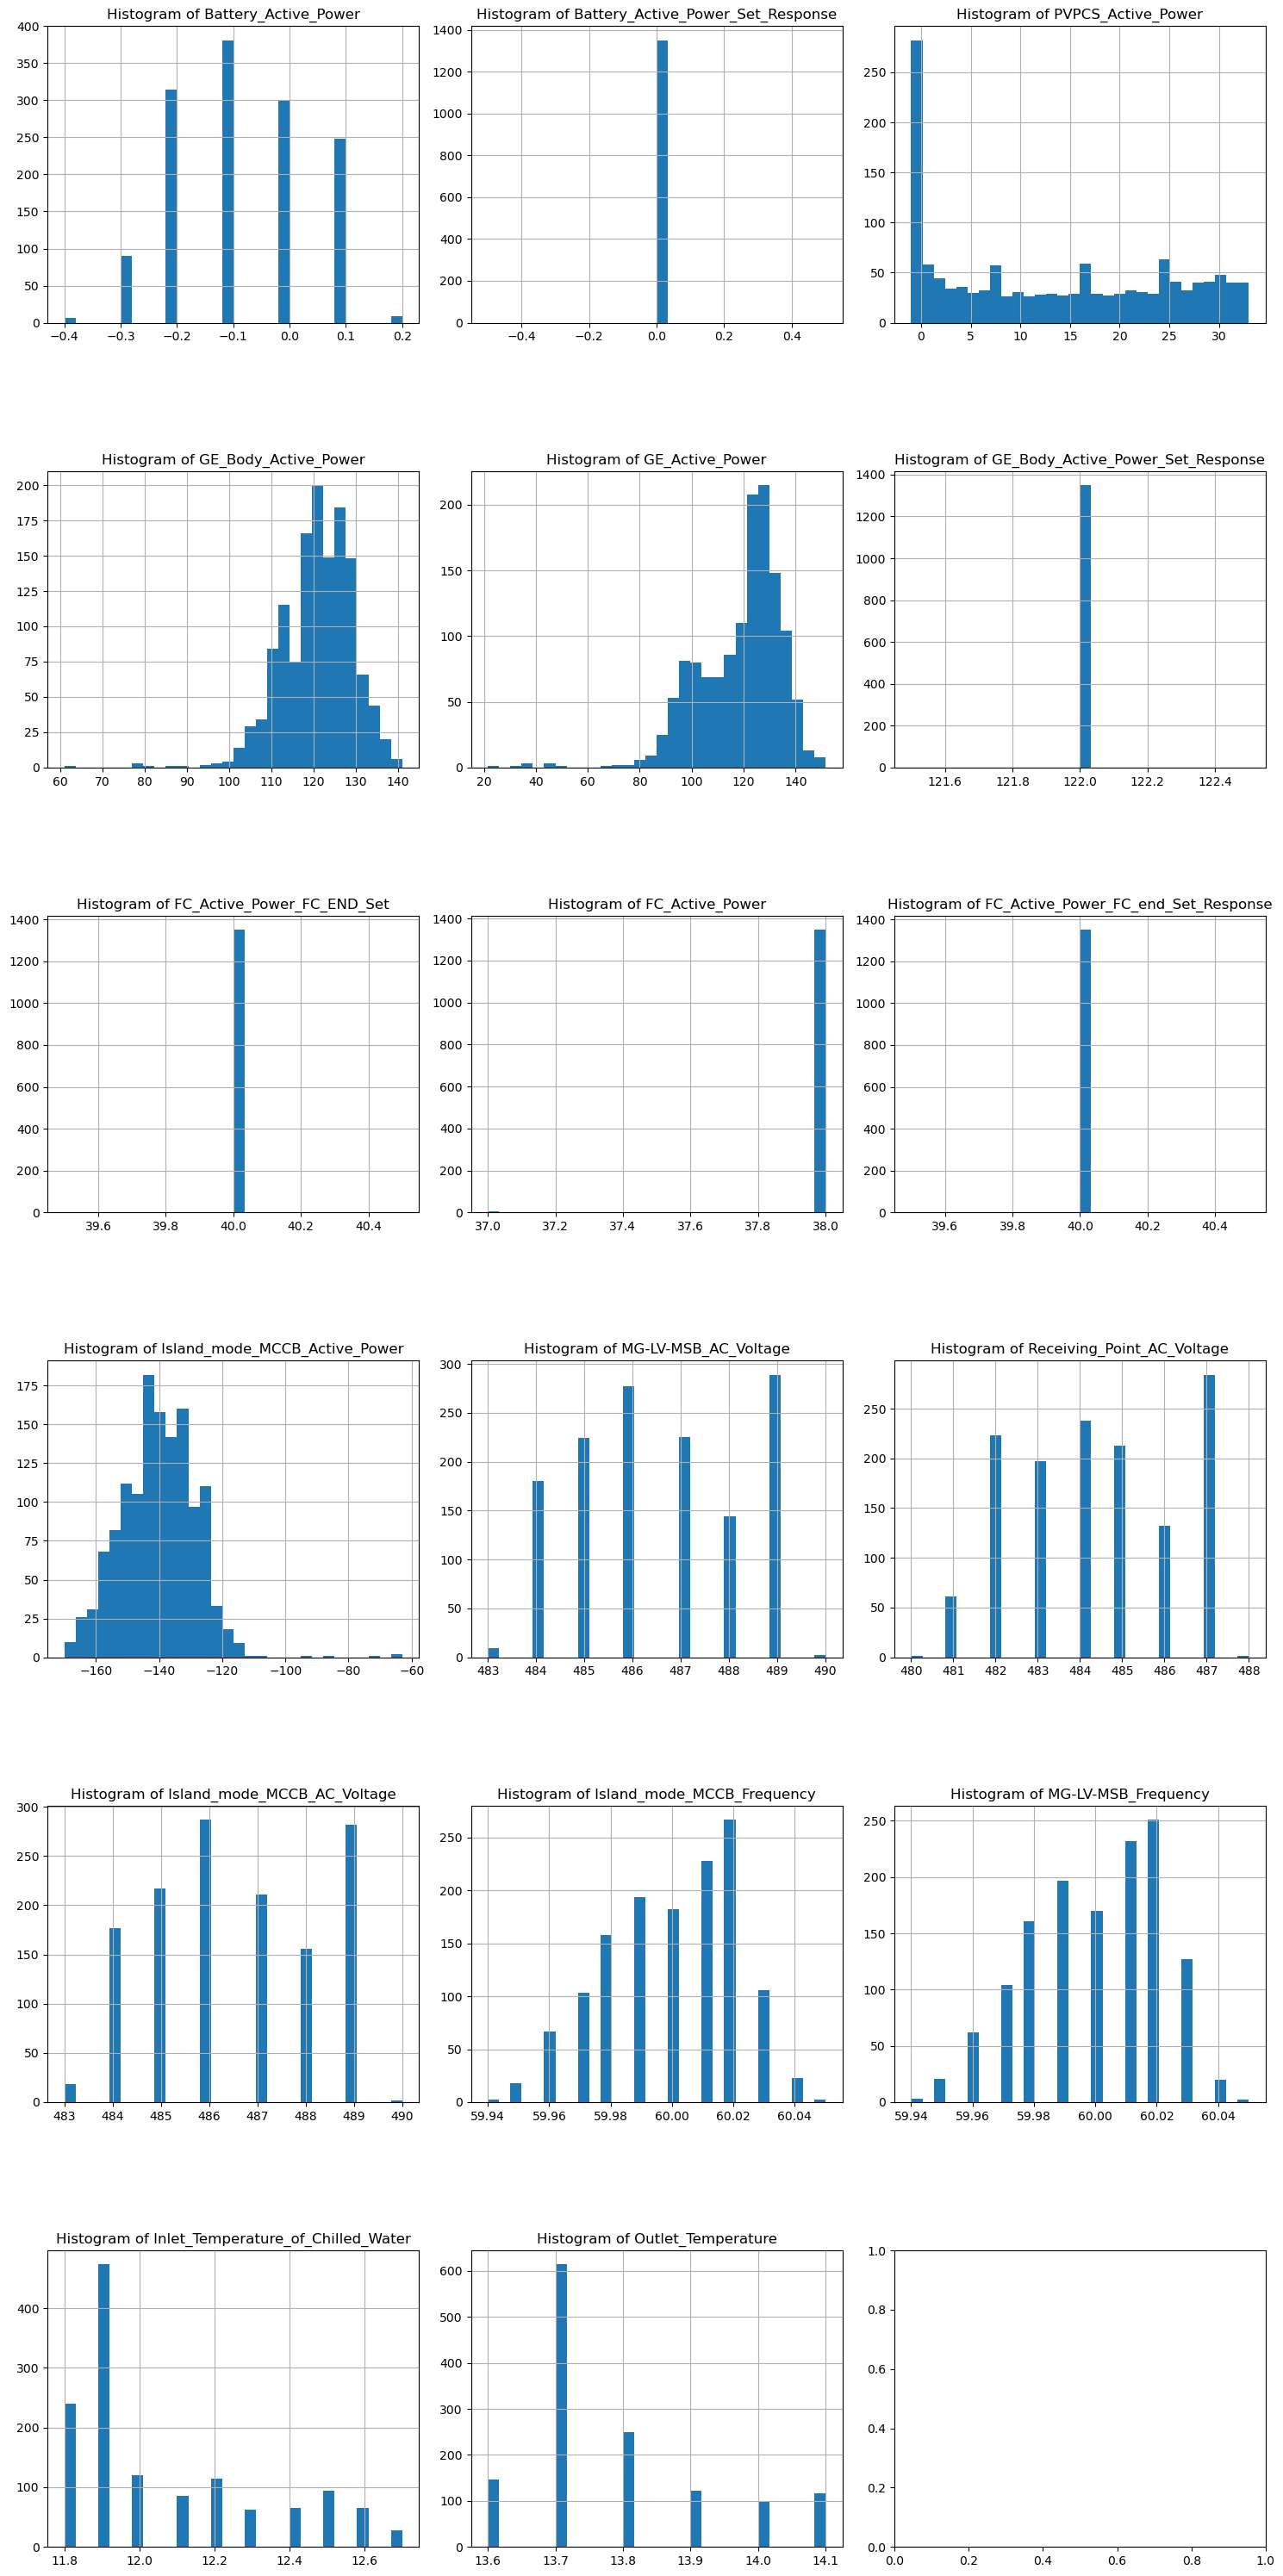

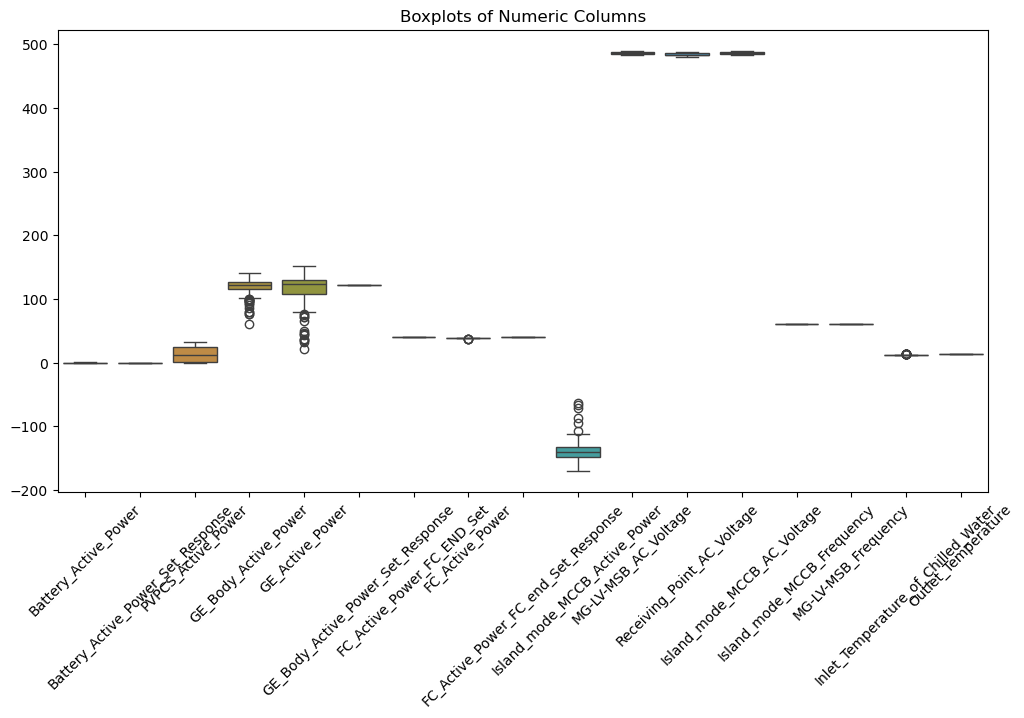

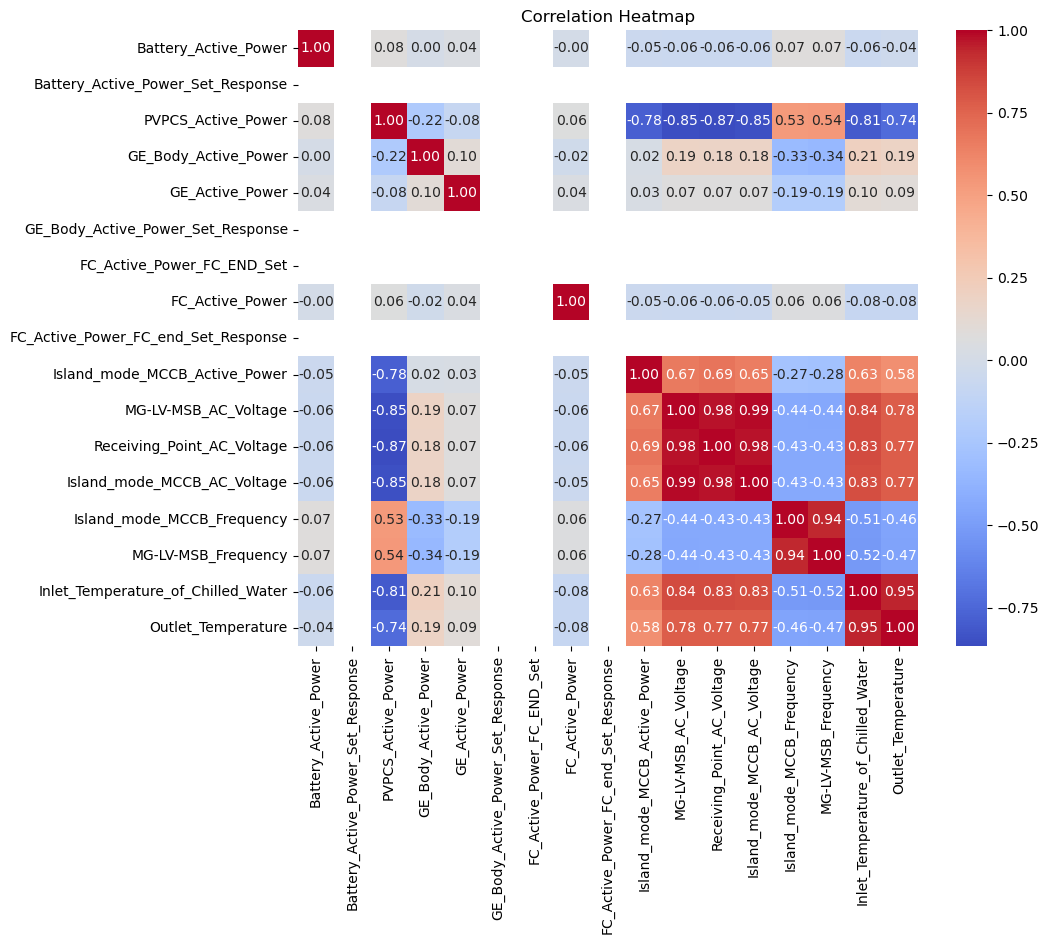

In [55]:
# Display statistics
display_statistics(df)

# Plot time-series data
plot_time_series(df, time_col)

# Plot histograms
# X AXIS - VARIABLE, y axis is the frequency
plot_histograms(df)

# Plot boxplots
plot_boxplots(df)

# Plot correlation heatmap
plot_correlation_heatmap(df)